> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [-noshowappointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This is a project analysis of noshowappointments_csv data from the kaggle website. The available columns in the data are: PatientId, AppointmentID, Gender, Scheduledday, Appointmentday, Ag', Neighbourhood, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, Sms_received and No-show. We will be analysising how some these variables affect possibility of the patient showing up for the appointment or not showing up. Our dependent variable will be "No-show" variables from the data.

### Question(s) for Analysis
a) How does age and gender help in the prediction of a patient showing up or not?

b? What is the relationship between chronic conditions(that is, hypertension diabetes, handicap and alcoholism) and the patient showing up or not?

c) Does having a scholarship have an impact on the patient showing up for the appointment or not?

In [2]:
#Loading the pckages to use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)




<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [4]:
#Loading the data(renamed it as noshowappointments_csv)
df = pd.read_csv('noshowappointments.csv')

Checking the number of columns and rows in the dataset using the shape() code

In [5]:
df.shape

(110527, 14)

Displaying the column headers for a quick overview of any typos 

In [6]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

Displaying a summary of the dataset, that is, the columns, the rows and the data type for each

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [8]:
#the data has no null values

To see the top rows, by default 5, we run the code head()

In [9]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Describe gives a statistical summary of the data, helps to spot some inconsistencies in the data, for example, in this data set, minimum age being -1.

In [10]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Duplicated() help to check if the data contains any duplicate values, which we need to handle before any analysis.

In [11]:
sum(df.duplicated())

0

In [ ]:
#no duplicate values


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [12]:
#from the data summary above, we have a min age of -1, checking to see how many columns with age less than 0.
df.query('Age < 0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [13]:
#dropping the row index with age -1 since it's the only row
df = df.drop(99832)

In [14]:
df.shape

(110526, 14)

In [15]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [16]:
#droping the patient id's columns because will not be used in the analysis
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace= True)

In [17]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [18]:
#Renaming the column names to lowercase
df.rename(str.lower, axis='columns', inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 12 columns):
gender            110526 non-null object
scheduledday      110526 non-null object
appointmentday    110526 non-null object
age               110526 non-null int64
neighbourhood     110526 non-null object
scholarship       110526 non-null int64
hipertension      110526 non-null int64
diabetes          110526 non-null int64
alcoholism        110526 non-null int64
handcap           110526 non-null int64
sms_received      110526 non-null int64
no-show           110526 non-null object
dtypes: int64(7), object(5)
memory usage: 11.0+ MB


In [20]:
#renaming the columns with mispelled columns and characters in between
df.rename(columns = {'sms_received':'smsreceived','no-show':'noshow', 'hipertension':'hypertension','handcap':'handicap'}, inplace = True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 12 columns):
gender            110526 non-null object
scheduledday      110526 non-null object
appointmentday    110526 non-null object
age               110526 non-null int64
neighbourhood     110526 non-null object
scholarship       110526 non-null int64
hypertension      110526 non-null int64
diabetes          110526 non-null int64
alcoholism        110526 non-null int64
handicap          110526 non-null int64
smsreceived       110526 non-null int64
noshow            110526 non-null object
dtypes: int64(7), object(5)
memory usage: 11.0+ MB


Using the function to_datetime to convert the date columns(scheduledday and appointmentday) from string data type to date time

In [22]:
df[['scheduledday','appointmentday']] = df[['scheduledday','appointmentday']].apply(pd.to_datetime)

In [23]:
#confirm the final structure of the date
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 12 columns):
gender            110526 non-null object
scheduledday      110526 non-null datetime64[ns, UTC]
appointmentday    110526 non-null datetime64[ns, UTC]
age               110526 non-null int64
neighbourhood     110526 non-null object
scholarship       110526 non-null int64
hypertension      110526 non-null int64
diabetes          110526 non-null int64
alcoholism        110526 non-null int64
handicap          110526 non-null int64
smsreceived       110526 non-null int64
noshow            110526 non-null object
dtypes: datetime64[ns, UTC](2), int64(7), object(3)
memory usage: 11.0+ MB


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (Age analysis and gender analysis)

To start with some 1d plots to check on the distribution of the data for some variables

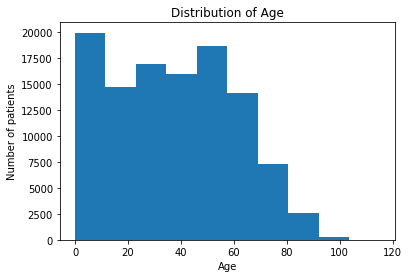

In [24]:
#age distribution plot
df['age'].plot(kind='hist');
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Number of patients');

A histogram showing the distribution of age in the dataset which shows that most of the appointments were for people who are younger.

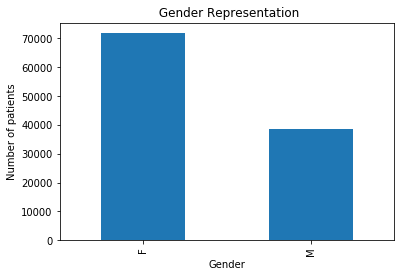

In [25]:
df['gender'].value_counts().plot(kind='bar');
plt.title(' Gender Representation')
plt.xlabel('Gender')
plt.ylabel('Number of patients');

A bar chart representing the gender distribution which shows that there were more females than males in the dataset.

In [26]:
#creating a mask for the no-show variable since it is the dependent variable

show = df.noshow == 'No'
no_show = df.noshow =='Yes'


In [27]:
#To check on the mean age of the created masks

df.age[show].mean()

37.790504154999034

In [28]:
df.age[no_show].mean()

34.31766656212196

 While stile putting into consideration the data had ages as low as 0, the above outputs show that the mean age of those showed up is above slightly than thhose who didn't show up.

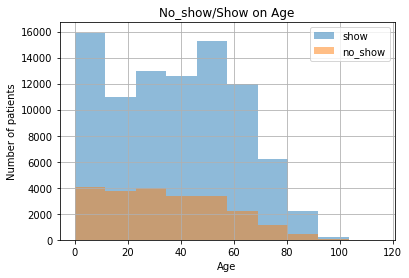

In [29]:
#more analysis on the age using a histogram visuel
df.age[show].hist(alpha=0.5, label='show')
df.age[no_show].hist(alpha=0.5, label='no_show');
plt.legend();
plt.title('No_show/Show on Age')
plt.xlabel('Age')
plt.ylabel('Number of patients');

A histogram on show/noshow-up against age. People with lower ages showed up to their appointments more than the older ages, probably these being children below 10 years.

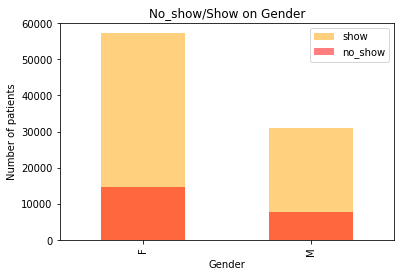

In [30]:
df.gender[show].value_counts().plot(kind='bar',alpha=0.5,label='show', color='orange');
df.gender[no_show].value_counts().plot(kind='bar', alpha=0.5, label='no_show', color='red');
plt.legend();

plt.title('No_show/Show on Gender')
plt.xlabel('Gender')
plt.ylabel('Number of patients');

In [31]:
#To check more on gender using individual bars

df.groupby('gender').noshow.value_counts()

gender  noshow
F       No        57245
        Yes       14594
M       No        30962
        Yes        7725
Name: noshow, dtype: int64

The summary output above shows that generally there were more females patients than males. And checking on their ratios, both female and males had almost equal parcentages of showing up for the appointments. 

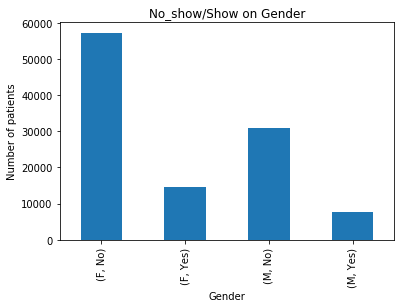

In [32]:
#Displaying the summary above in a bar chart
df.groupby('gender').noshow.value_counts().plot(kind='bar');
plt.title('No_show/Show on Gender')
plt.xlabel('Gender')
plt.ylabel('Number of patients');

A bar chart on show/noshow on gender. 

### Research Question 2  (The relationship between chronic conditions and the patient showing up or not )

First will check the data to have a quick assessment on the percentage of each variable

In [33]:
def counts(x):
    return df.groupby(x).noshow.value_counts()

In [34]:
counts('hypertension')

hypertension  noshow
0             No        70178
              Yes       18547
1             No        18029
              Yes        3772
Name: noshow, dtype: int64

In [35]:
counts('diabetes')


diabetes  noshow
0         No        81694
          Yes       20889
1         No         6513
          Yes        1430
Name: noshow, dtype: int64

In [36]:
counts('alcoholism')

alcoholism  noshow
0           No        85524
            Yes       21642
1           No         2683
            Yes         677
Name: noshow, dtype: int64

In [37]:
counts('handicap')

handicap  noshow
0         No        86373
          Yes       21912
1         No         1676
          Yes         366
2         No          146
          Yes          37
3         No           10
          Yes           3
4         No            2
          Yes           1
Name: noshow, dtype: int64

Defining a function which will show the variables above in a visual representations(bar graph).

In [ ]:
def chronic_disorders(x,y,t):
    
    plt.title(t)
    plt.ylabel(y)
    plt.xlabel(x)
    plt.show() 


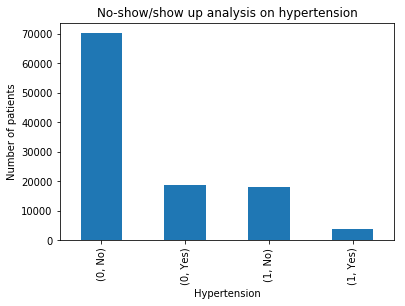

In [40]:
df.groupby('hypertension').noshow.value_counts().plot(kind='bar')
chronic_disorders('Hypertension', 'Number of patients', 'No-show/show up analysis on hypertension')

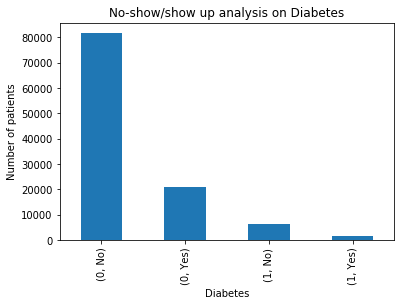

In [42]:
df.groupby('diabetes').noshow.value_counts().plot(kind='bar')
chronic_disorders('Diabetes', 'Number of patients', 'No-show/show up analysis on Diabetes')

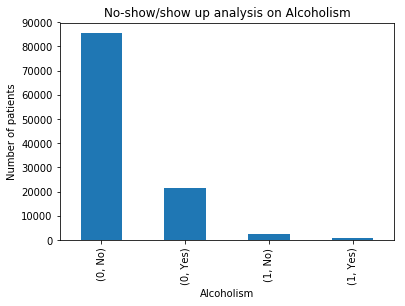

In [43]:
df.groupby('alcoholism').noshow.value_counts().plot(kind='bar')
chronic_disorders('Alcoholism', 'Number of patients', 'No-show/show up analysis on Alcoholism')

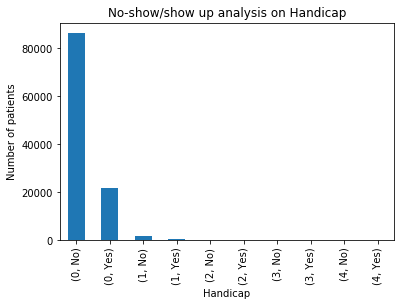

In [45]:
df.groupby('handicap').noshow.value_counts().plot(kind='bar')
chronic_disorders('Handicap', 'Number of patients', 'No-show/show up analysis on Handicap')

### Analysis on the scholarship and the smsreceived

In [48]:
counts('scholarship')

scholarship  noshow
0            No        79924
             Yes       19741
1            No         8283
             Yes        2578
Name: noshow, dtype: int64

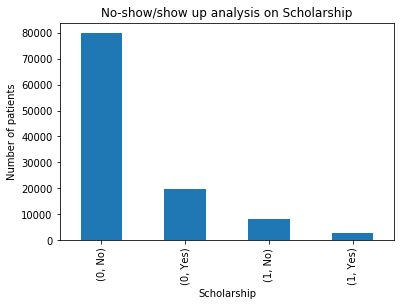

In [49]:
df.groupby('scholarship').noshow.value_counts().plot(kind='bar')
chronic_disorders('Scholarship', 'Number of patients', 'No-show/show up analysis on Scholarship')

A bar chart showing the relationship between the patients with/without scholarship and them showing or not showing up for the appointment. The patients with no scholarship had a slightly higher percentage of showing more than those with the scholarship. 

In [46]:
counts('smsreceived')

smsreceived  noshow
0            No        62509
             Yes       12535
1            No        25698
             Yes        9784
Name: noshow, dtype: int64

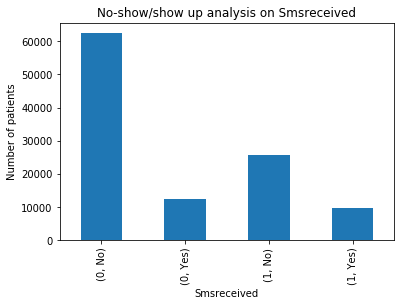

In [47]:
df.groupby('smsreceived').noshow.value_counts().plot(kind='bar')
chronic_disorders('Smsreceived', 'Number of patients', 'No-show/show up analysis on Smsreceived')

A bar chart show the relation between the patient receiving the SMS and them showing up. The patient who did not received the message had a higher percentage of showing up than actually those who did receive the message.

<a id='conclusions'></a>
## Conclusions

A). Patients with younger ages showed more for the appointment than older people. Children are at a higher risk of sickness and these could have contributed more plus they need regular check ups.
b). Females showed up more for their appointments more than males. Generally females tend to worry more about their health than males.
c). Chronic illness contributed a little bit more for a patient showing up especially being handicapped.

Limitation
Unlike it's expected that patients would show up more once they receive an SMS about their appointment, that data showed that patients who did ot receive the message showed up more than those who received. Probably the means of communication was a challenge.

References

https://pandas.pydata.org/pandas-docs/stable/reference/api/

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!-


This is a resubmission after a review which request me to do the following:
a) Add 1d visuels on variables - which have been added on age and gender variables
b) Add at least one function - Add a function to convert date columns from string data type to datetime
c) Add markdowns on the taken data wrangling steps

In [50]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0